In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
plt.rcParams["figure.figsize"] = (10, 6)

In [63]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


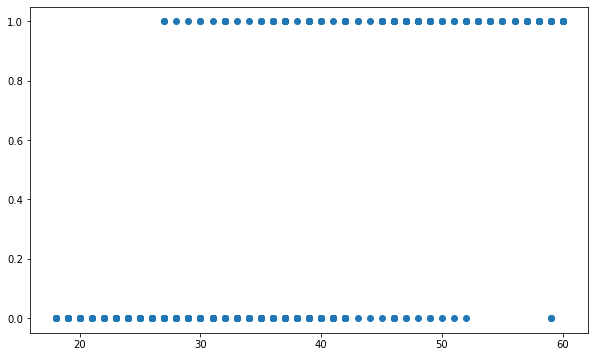

In [64]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()


In [65]:
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)


In [66]:
X=data['Age']
X=X-X.mean()
Y=data['Purchased']

In [67]:
a0=0
a1=0
L=0.001
es=150

for e in range(es):
    ypred = np.array([1 / (1 + exp(-1*a0 + -1*a1*x)) for x in X]) 
    Da0 = -2 * sum((Y - ypred) * ypred * (1 - ypred)) 
    Da1 = -2 * sum(X * (Y - ypred) * ypred * (1 - ypred)) 
    a0 = a0 - L * Da0
    a1 = a1 - L * Da1    
    
    


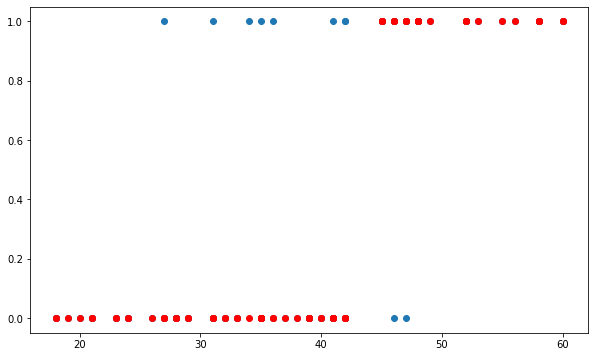

In [69]:
X_test_norm = X_test-X_test.mean()
ypred = np.array([1 / (1 + exp(-1*a0 + -1*a1*x)) for x in X_test_norm])
ypred = [1 if p >= 0.5 else 0 for p in ypred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, ypred, c="red")
plt.show()